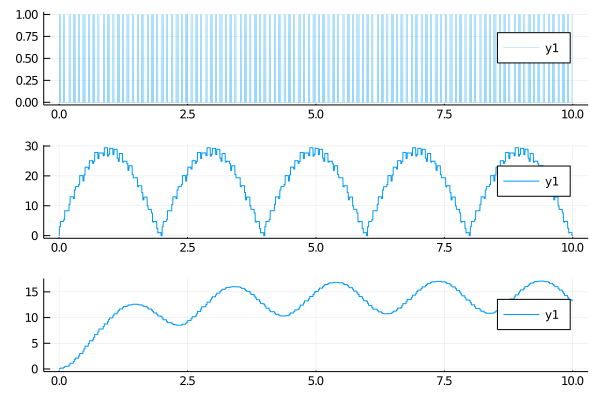

In [22]:
using Plots

mutable struct analizer
    time::Real
    score::Complex
    smooth_score::Complex
    low_pass_const::Real

    freq::Real
end
a = analizer(0, 0, 0, 0.01, 10)

function f(a::analizer, t, val)
    a.score += val * (cos(t * a.freq * 2pi) - im * sin(t * a.freq * 2pi))
    a.smooth_score = a.smooth_score + a.low_pass_const * (a.score - a.smooth_score)
end

arr = []
sarr = []
y = []

t = 0:0.001:10

for i in t
    if sin(i * 2pi * 10.5 + 1) > 0
        w = 1
    else
        w = 0
    end
    
    val = 0
    if sin(i * 48 * 2pi) * w > 0.9
        val = 1
    end
    
    if rand(Float64) > 1
        val = 1
    end
 
    append!(y, val)
    
    if val > 0.3
        f(a, i, 1)
    end


    append!(arr, a.score)
    append!(sarr, a.smooth_score)
end

sig_plot = plot(t, y, linewidth=.2)
acc_plot = plot(t, abs.(arr))
smooth_acc_plot = plot(t, abs.(sarr))

plot(sig_plot, acc_plot, smooth_acc_plot, layout=(3, 1))
#savefig("1.png")